In [92]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# Load the dataset
df = pd.read_csv("C:/Users/gomat/Downloads/bank-full.csv", sep=';')  # adjust separator if needed
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [94]:
#  Check for missing values and data types
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
age          0
job          0
marital      0
education    0
default      0
balance      0
hous

In [95]:
df = df.drop(['day'], axis=1)

In [96]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('y')

In [97]:
# Label encode binary categorical columns
label_encoder = LabelEncoder()
for col in cat_cols:
    if df[col].nunique() == 2:
        df[col] = label_encoder.fit_transform(df[col])
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

In [98]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})


In [99]:
df['y']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [100]:
print("Final data shape:", df.shape)

Final data shape: (45211, 42)


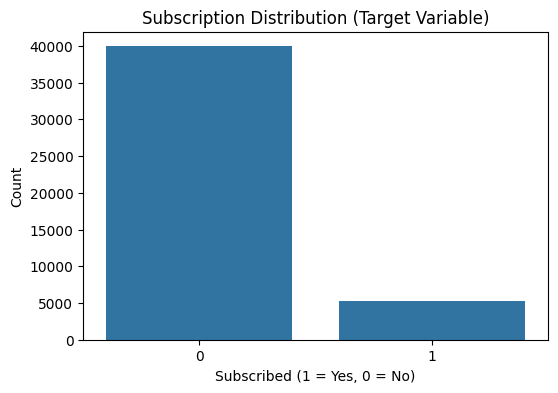

In [101]:
# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='y')
plt.title('Subscription Distribution (Target Variable)')
plt.xlabel('Subscribed (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

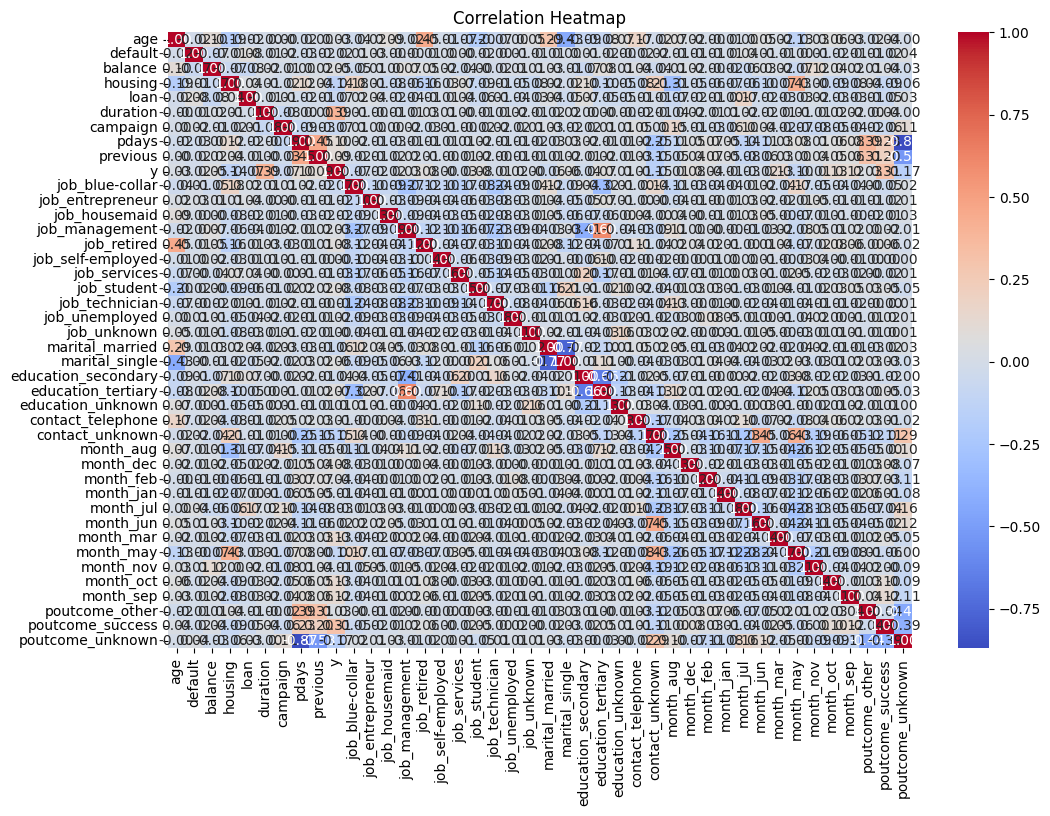

In [102]:
#  Correlation heatmap 
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

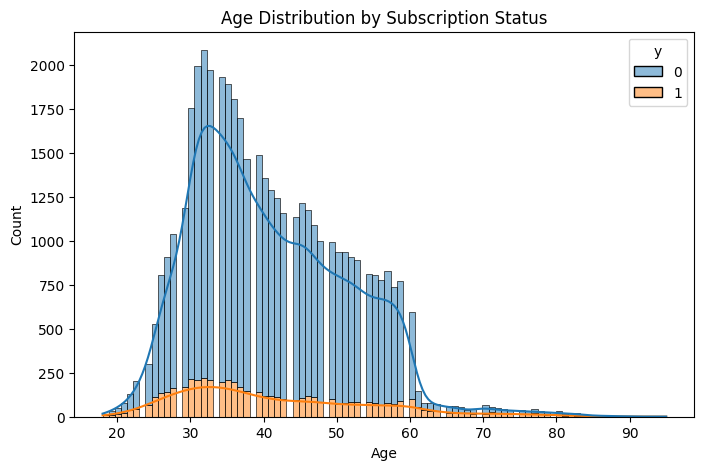

In [103]:
# 3. Age distribution by target
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', hue='y', kde=True, multiple='stack')
plt.title('Age Distribution by Subscription Status')
plt.xlabel('Age')
plt.show()

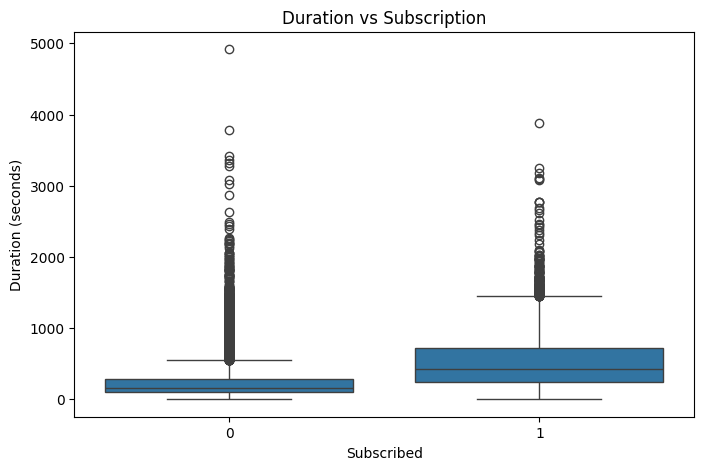

In [104]:
# 4. Boxplot: Duration vs Subscription
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='y', y='duration')
plt.title('Duration vs Subscription')
plt.xlabel('Subscribed')
plt.ylabel('Duration (seconds)')
plt.show()

In [105]:
%matplotlib inline

In [106]:
df_job = pd.read_csv("C:/Users/gomat/Downloads/bank-full.csv", sep=';')
print(df_job.columns)
print(df_job[['job', 'y']].head())

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
            job   y
0    management  no
1    technician  no
2  entrepreneur  no
3   blue-collar  no
4       unknown  no


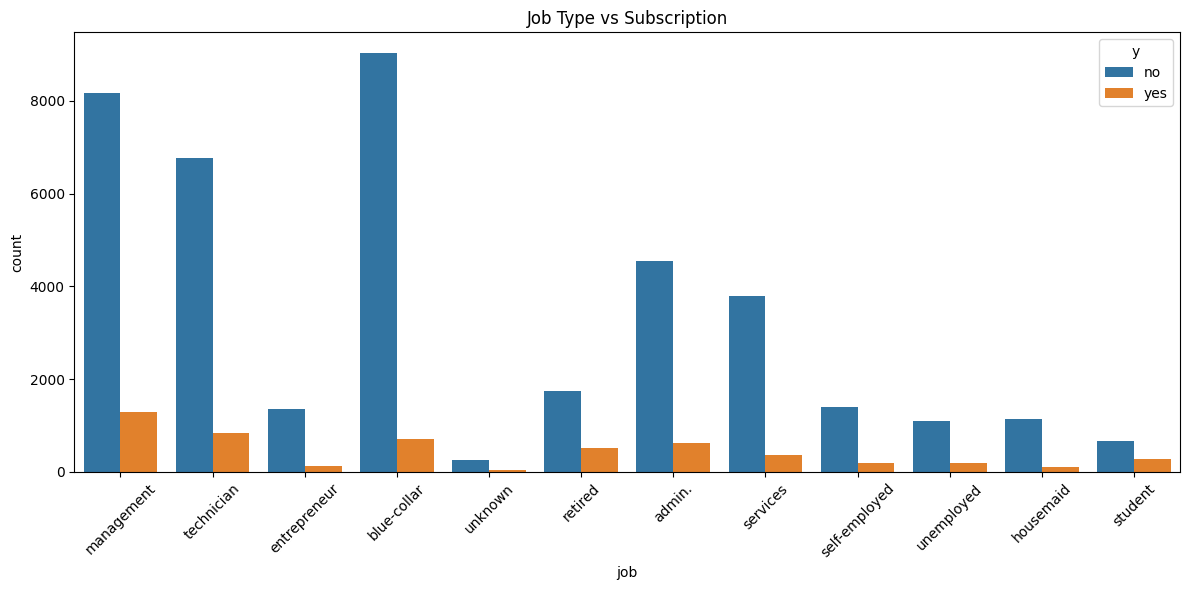

In [107]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_job, x='job', hue='y')
plt.title('Job Type vs Subscription')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

lets train the data

In [108]:
# lets the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [109]:
# split the feature and target columns
X = df.drop('y', axis=1)
y = df['y']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [111]:
# Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

c:\Users\gomat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [112]:
#  Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [113]:
# Evaluation
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

print(" Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Logistic Regression Results:
[[7785  200]
 [ 687  371]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.65      0.35      0.46      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043

Accuracy: 0.9019130819418335
 Random Forest Results:
[[7761  224]
 [ 611  447]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.67      0.42      0.52      1058

    accuracy                           0.91      9043
   macro avg       0.80      0.70      0.73      9043
weighted avg       0.90      0.91      0.90      9043

Accuracy: 0.9076633860444543


In [114]:
from sklearn.metrics import roc_auc_score, roc_curve

In [115]:
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [116]:
# ROC AUC Score
auc = roc_auc_score(y_test, y_proba_rf)
print("Random Forest AUC Score:", round(auc, 3))

Random Forest AUC Score: 0.92


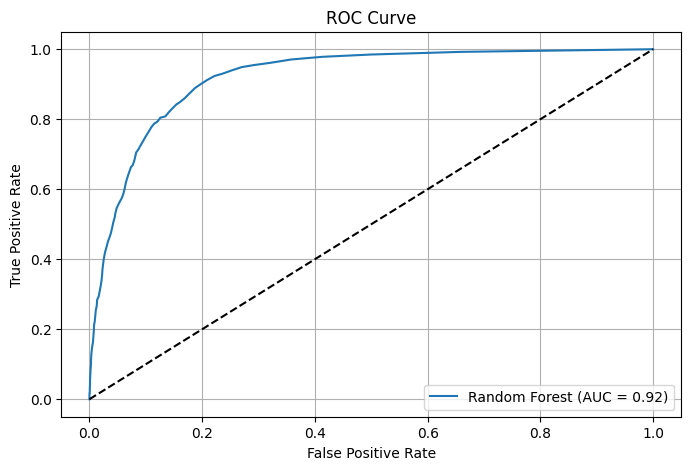

In [117]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [118]:
import joblib
features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'housing', 'loan', 'default']

X = df[features]
y = df['y']

# Then split and train your model
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Save this model
joblib.dump(rf_model, 'rf_model.pkl')
# Save the random forest model
joblib.dump(rf_model, 'rf_model.pkl')
print("Model saved as rf_model.pkl")

Model saved as rf_model.pkl


In [119]:
# Load model
loaded_model = joblib.load('rf_model.pkl')